In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
df = pd.read_csv('data_viz1.csv')

In [13]:
df.shape

(3329, 21)

In [14]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"28.4160° N, 76.9914° E",28.416,76.9914
1,flat,avl 36 gurgaon,sector 36,0.75,7500.0,2.0,2.0,2,5.0,Relatively New,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,"28.4160° N, 76.9914° E",28.416,76.9914
2,flat,signature global park 4,sector 36,1.00,9901.0,3.0,2.0,3,2.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,128.0,"28.4160° N, 76.9914° E",28.416,76.9914
3,flat,krisumi waterfall residences,sector 36,4.10,15501.0,3.0,4.0,3,30.0,New Property,...,1.0,0.0,0.0,0.0,0.0,2.0,49.0,"28.4160° N, 76.9914° E",28.416,76.9914
4,flat,signature global park 4,sector 36,0.72,6660.0,3.0,2.0,3,3.0,Under Construction,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"28.4160° N, 76.9914° E",28.416,76.9914


In [15]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3329 non-null   object 
 1   society          3329 non-null   object 
 2   sector           3329 non-null   object 
 3   price            3329 non-null   float64
 4   price_per_sqft   3329 non-null   float64
 5   bedRoom          3329 non-null   float64
 6   bathroom         3329 non-null   float64
 7   balcony          3329 non-null   object 
 8   floorNum         3329 non-null   float64
 9   agePossession    3329 non-null   object 
 10  built_up_area    3329 non-null   float64
 11  study room       3329 non-null   float64
 12  servant room     3329 non-null   float64
 13  store room       3329 non-null   float64
 14  pooja room       3329 non-null   float64
 15  others           3329 non-null   float64
 16  furnishing_type  3329 non-null   float64
 17  luxury_score  

In [17]:
group_df = df.groupby('sector')[['price','price_per_sqft','built_up_area','latitude','longitude']].mean()


In [18]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


In [19]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [20]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [21]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Lajpat Nagar,flat,builder floor,0.60,6000.0,1000.0,Super Built up area 1000(92.9 sq.m.)Built Up a...,3,2,1,not available,"Lajpat Nagar, Main Railway Road, Gurgaon, Lajp...",3.0,East,0 to 1 Year Old,"['Hanuman Mandir', 'Sheetla Mata Mandir', 'Jac...",Property in very good location in the centre o...,[],NaN,NaN
1,6 Bedroom House for sale in Sector 33 Gurgaon,house,unitech uniworld resorts,8.00,17778.0,4500.0,Built Up area: 500 (418.06 sq.m.),6,5,3+,not available,"A 121 The Villas Uniworld Resorts, Sector 33 G...",4.0,NaN,undefined,NaN,6bhk villa for resale in unitech the villas at...,NaN,NaN,"['Environment3 out of 5', 'Lifestyle4 out of 5..."
2,4 Bedroom House for sale in Sector 50 Gurgaon,house,ss hibiscus,12.50,40850.0,3060.0,Plot area 470(392.98 sq.m.)Built Up area: 410 ...,4,4,3+,"servant room,study room","Sector 50 Gurgaon, Gurgaon, Haryana",2.0,West,1 to 5 Year Old,"['Baani Square', 'SS Plaza', 'Good Earth City ...",For sale 4 bhk villa in the hibiscus gurgaon. ...,"['1 Water Purifier', '5 Fan', '1 Fridge', '1 E...","['Centrally Air Conditioned', 'Water purifier'...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,3 BHK Flat in Sector 95 Gurgaon,flat,rof ananda,0.38,5899.0,644.0,Carpet area: 644.12 (59.84 sq.m.),3,2,1,pooja room,"203, Sector 95 Gurgaon, Gurgaon, Haryana",2.0,South-East,1 to 5 Year Old,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk',...",Rof ananda is one of gurgaon's most sought aft...,"['5 Fan', '1 Exhaust Fan', '1 Geyser', '8 Ligh...","['Power Back-up', 'Security / Fire Alarm', 'In...","['Environment4 out of 5', 'Lifestyle4.5 out of..."
4,2 BHK Flat in Sector 4 Urban Estate,flat,apna enclave,0.60,6667.0,900.0,Built Up area: 900 (83.61 sq.m.)Carpet area: 7...,2,2,1,not available,"Sector 4 Urban Estate, Gurgaon, Haryana",1.0,North-East,undefined,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","2 bath, semi-Furnished, 1st floor (Of 4), nort...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN


In [22]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [25]:
wordcloud_df.sample(10)

,features,sector
1324,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 37
3057,"['Centrally Air Conditioned', 'Water purifier'...",sector 23
2175,"['Feng Shui / Vaastu Compliant', 'Private Gard...",sector 50
1504,"['Feng Shui / Vaastu Compliant', 'Private Gard...",sector 61
419,"['Centrally Air Conditioned', 'Water purifier'...",sector 26
814,"['Private Garden / Terrace', 'Maintenance Staf...",sector 107
1343,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 37
1804,['Private Garden / Terrace'],sector 43
805,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 107
2418,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",sector 71


In [26]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [27]:
main

['Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Power Back-up',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'False Ceiling Lighting',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Rain Water Harvesting',
 'Water softening plant',
 'Intercom Facility',
 'Lift(s)',
 'Feng Shui / Vaastu Compliant',
 'Swimming Pool',
 'Security Personnel',
 

In [28]:
from wordcloud import WordCloud

In [29]:
feature_text = ' '.join(main)

In [30]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [31]:
feature_text

'Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Fitness Centre / GYM Club house / Community Center Power Back-up Security / Fire Alarm Intercom Facility Lift(s) False Ceiling Lighting Water Storage Park Visitor Parking Shopping Centre Fitness Centre / GYM Rain Water Harvesting Water softening plant Intercom Facility Lift(s) Feng Shui / Vaastu Compliant Swimming Pool Security Personnel Maintenance Staff Park Club house / Community Center Fitness Centre / GYM Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water S

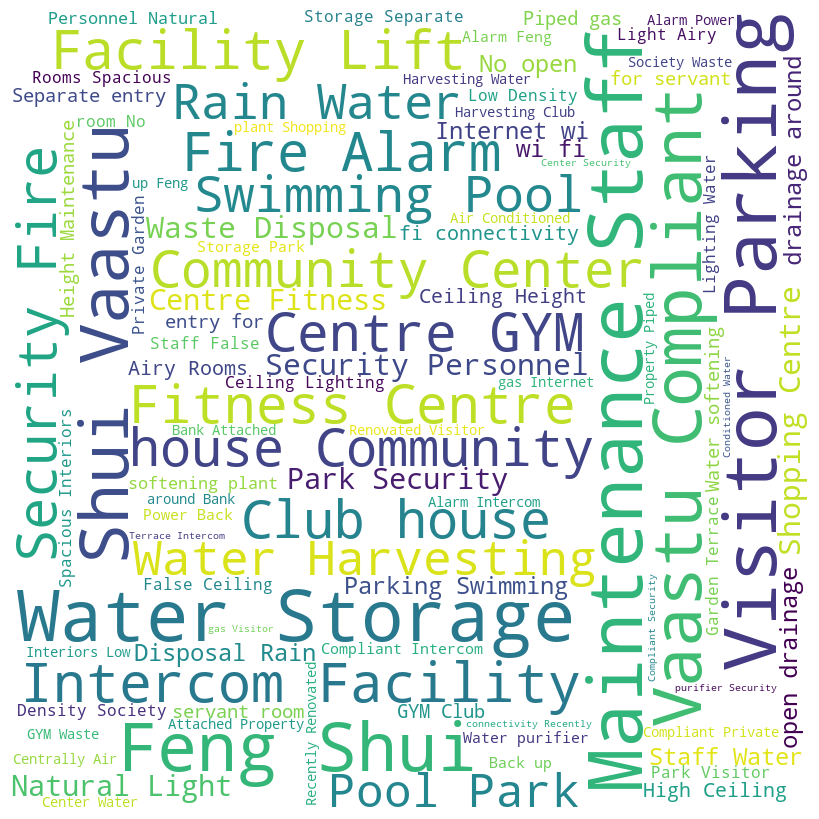

In [32]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [33]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [34]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [35]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [36]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


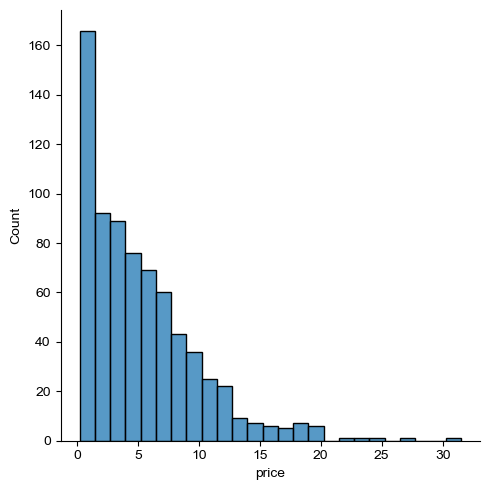

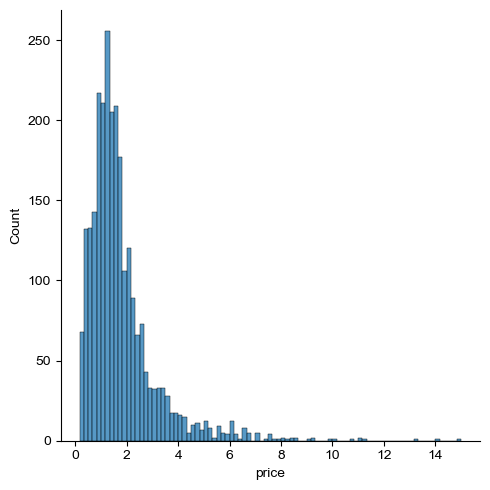

In [ ]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])